In [1]:
# import packages and suppress warnings

suppressPackageStartupMessages(library(pathfindR))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(biomaRt))
suppressPackageStartupMessages(library(limma))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

In [25]:
# define directories

pathfindR_dir = "/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/CYTOi/Expression_Mutation_CNA/pathfindR/GDSC_PDX_TCGA_First_Strategy/"
gdsc_dir = "/Volumes/Expansion/Thesis Work/Supplementary Files/GDSC/"
exp_dir = "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/"
output_dir = "/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Figures/"

In [3]:
# create directory for pathfindR analysis and change to that directory

dir.create(pathfindR_dir, showWarnings = FALSE)
setwd(pathfindR_dir)
getwd()

[1] "/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/CYTOi/Expression_Mutation_CNA/pathfindR/GDSC_PDX_TCGA_First_Strategy"

In [4]:
# read DEGs table of paclitaxel (CYTOi)

input_df <- read.delim(paste0(pathfindR_dir, "/GDSC_Expression_Mutation_CNA_Filtered_DEGs_Table_CYTOi_Paclitaxel_First_Strategy.tsv"))
input_df <- input_df[,c("symbol","logFC","adj.P.Val")]

head(input_df, 3)

,symbol,logFC,adj.P.Val
,<chr>,<dbl>,<dbl>
1,TMEM40,-1.268480,6.685337e-07
2,CFAP251,-1.264376,6.685337e-07
3,RHBDL2,-1.153997,7.503903e-07


## Testing input

The input looks OK

## Processing input. Converting gene symbols,
          if necessary (and if human gene symbols provided)

Number of genes provided in input: 707

Number of genes in input after p-value filtering: 167



Could not find any interactions for 91 (54.49%) genes in the PIN

Final number of genes in input: 76

## Performing Active Subnetwork Search and Enrichment

## Processing the enrichment results over all iterations

## Annotating involved genes and visualizing enriched terms

## Creating HTML report



processing file: results.Rmd



1/3        
2/3 [setup]
3/3        


output file: results.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS results.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandocfaebc2563d5.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmpejDoJH/rmarkdown-strfaeb3d2222f6.html 



Output created: results.html



processing file: enriched_terms.Rmd



1/4        
2/4 [setup]
3/4        
4/4 [table]


output file: enriched_terms.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS enriched_terms.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandocfaeb79e034c1.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmpejDoJH/rmarkdown-strfaeb1b9789ed.html 



Output created: enriched_terms.html



processing file: conversion_table.Rmd



1/6                              
2/6 [setup]                      
3/6                              
4/6 [converted_tbl, table1]      
5/6                              
6/6 [gene_wo_interaction, table2]


output file: conversion_table.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS conversion_table.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandocfaeb27b0d892.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//RtmpejDoJH/rmarkdown-strfaeb45f05e15.html 


Output created: conversion_table.html

Plotting the enrichment bubble chart

Found 94 enriched terms



You may run:


- cluster_enriched_terms() for clustering enriched terms


- visualize_terms() for visualizing enriched term diagrams





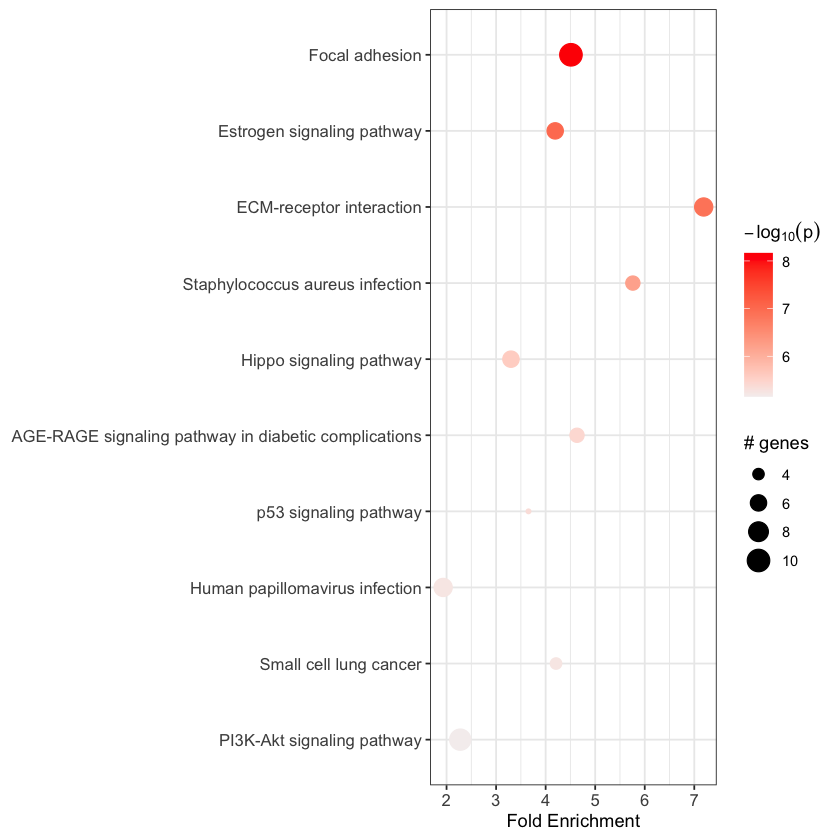

In [5]:
# run pathfindR

output_df <- run_pathfindR(input_df, 
                            output_dir = paste(pathfindR_dir,"KEGG_figure5",sep="/"),
                            pin_name_path = "KEGG",
                            adj_method = "fdr",
                            enrichment_threshold = 0.05,
                            min_gset_size = 5,
                            max_gset_size = 500,
                            iterations = 25,
                            gene_sets= "KEGG")

Plotting the enrichment bubble chart

Plotting the enrichment bubble chart



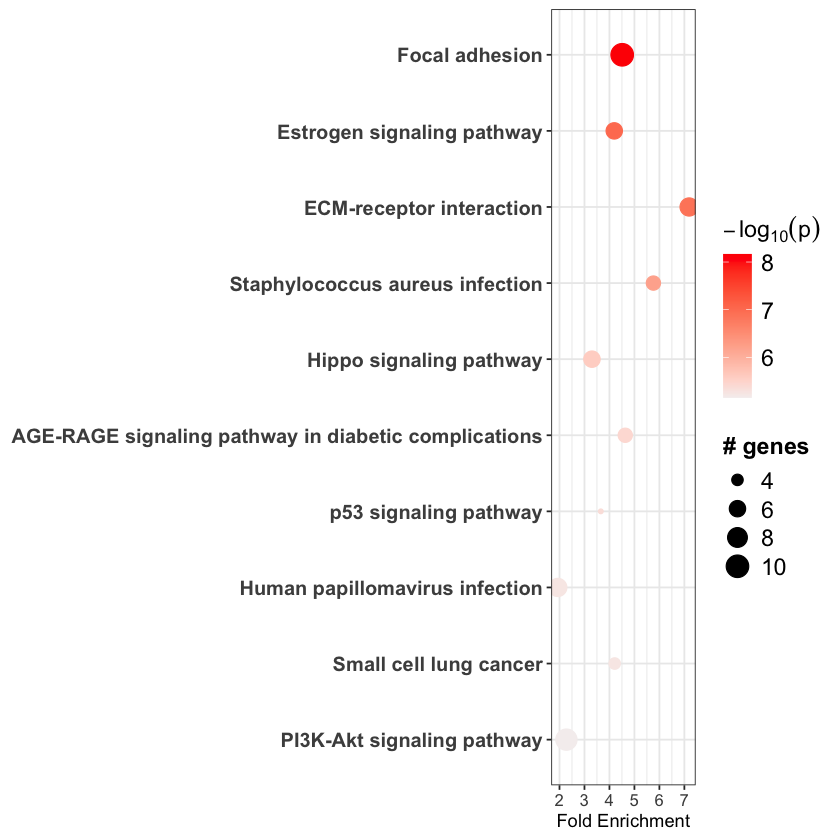

In [6]:
# Modify y-label size, x-label size, and legend visuals

gg_list <- enrichment_chart(
    result_df = output_df,
    top_terms = 10
) + 
#ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nTop 10 KEGG Pathway Enrichment Terms\n") +  
#ggplot2::theme(
#    plot.title = element_text(size = 12, face = "bold", hjust = 0.5)  
#) +
ggplot2::scale_x_continuous(
    breaks = c(2, 3, 4, 5, 6, 7, 8, 9),  # Custom x-axis tick values
    labels = c("2", "3", "4", "5", "6","7","8","9")  # Optional: Add custom labels for ticks
)
#ggplot2::theme(
#    plot.title = ggplot2::element_text(size = 24, face = "bold", hjust = 0.5),  
#    axis.title.x = ggplot2::element_blank(),                                    
#    axis.text.y = ggplot2::element_text(size = 12, face = "bold"),              
#    axis.text.x = ggplot2::element_text(size = 12, face = "bold"),              
#    legend.title = ggplot2::element_text(size = 20, face = "bold"),             
#    legend.text = ggplot2::element_text(size = 18),                            
#    legend.key.size = ggplot2::unit(1.2, "cm")                                  
#)

# Create the enrichment plot and store it in a variable
fold_enrichment_figure <- enrichment_chart(
    result_df = output_df,
    top_terms = 10
) + 
#ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nTop 10 KEGG Pathway Enrichment Terms\n") +  
ggplot2::theme(
    #plot.title = element_text(size = 12, face = "bold", hjust = 0.5)  
    axis.text.y = ggplot2::element_text(size = 12, face = "bold"),              
    legend.title = ggplot2::element_text(size = 14, face = "bold"),             
    legend.text = ggplot2::element_text(size = 14),                            
    #legend.key.size = ggplot2::unit(1, "cm")  
) +
ggplot2::scale_x_continuous(
    breaks = c(2, 3, 4, 5, 6, 7, 8),  
    labels = c("2", "3", "4", "5", "6", "7", "8")  
)


print(fold_enrichment_figure)

In [7]:
# cluster enriched terms

pathfindR_output_clustered <- cluster_enriched_terms(output_df, 
                                                     plot_dend = FALSE, 
                                                     plot_clusters_graph = FALSE)

# knitr::kable(head(pathfindR_output_clustered, 2))

The maximum average silhouette width was 0.33 for k = 17 





In [8]:
# show output of pathfindR clustered table

pathfindR_output_clustered

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa04510,Focal adhesion,4.510582,25,0.12765957,6.845740e-09,6.845740e-09,FYN,"ITGA2, FLNB, MYL9, LAMB2, LAMB3, LAMC2, THBS1, EGFR, VEGFC",1,Representative
3,hsa04512,ECM-receptor interaction,7.189759,25,0.02127660,1.310114e-07,1.310114e-07,,"LAMB2, LAMB3, LAMC2, THBS1, SDC4, ITGA2, DSPP",1,Member
8,hsa05165,Human papillomavirus infection,1.931230,25,0.04255319,5.710738e-06,5.710738e-06,TCF7L2,"EGFR, ITGA2, LAMB2, LAMB3, LAMC2, THBS1",1,Member
9,hsa05222,Small cell lung cancer,4.209877,25,0.02127660,5.710738e-06,5.710738e-06,,"ITGA2, LAMB2, LAMB3, LAMC2",1,Member
10,hsa04151,PI3K-Akt signaling pathway,2.276706,25,0.12500000,7.015424e-06,7.015424e-06,,"EGFR, EPHA2, AREG, VEGFC, ITGA2, LAMB2, LAMB3, LAMC2, THBS1",1,Member
19,hsa05146,Amoebiasis,4.534574,25,0.04081633,4.117122e-04,4.117122e-04,,"LAMB2, LAMB3, LAMC2, SERPINB6, SERPINB3",1,Member
25,hsa05200,Pathways in cancer,1.725709,25,0.06382979,1.355741e-03,1.355741e-03,"TCF7L2, CXCR4","LAMB2, LAMB3, LAMC2, ITGA2, EGFR, JUP, VEGFC, EDN1",1,Member
52,hsa05145,Toxoplasmosis,2.664062,25,0.02127660,1.376109e-02,1.376109e-02,,"LAMB2, LAMB3, LAMC2",1,Member
2,hsa04915,Estrogen signaling pathway,4.192623,25,0.06382979,9.595092e-08,9.595092e-08,,"EGFR, KRT13, KRT14, KRT15, KRT18, KRT19",2,Representative


# GDSC ###

In [9]:
# select significant terms 

terms_significant <- c("Focal adhesion",
                       "p53 signaling pathway",
                       "Estrogen signaling pathway",
                       "ECM-receptor interaction",
                       "Hippo signaling pathway",
                       "PI3K-Akt signaling pathway",
                       "Adherens junction",
                       "Tight junction",
                       "Pyruvate metabolism",
                       "HIF-1 signaling pathway",
                       "Ras signaling pathway",
                       "MAPK signaling pathway",
                       "IL-17 signaling pathway",
                       "Gap junction",
                       "Axon guidance",
                       "MicroRNAs in cancer",
                       "Motor proteins",
                       "Cytoskeleton in muscle cells",
                       "Wnt signaling pathway",
                       "TNF signaling pathway",
                       "FoxO signaling pathway",
                       "Regulation of actin cytoskeleton",
                       "Natural killer cell mediated cytotoxicity")
save_filtered <- pathfindR_output_clustered[pathfindR_output_clustered$Term_Description %in% terms_significant,]

In [10]:
head(save_filtered, 1)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa04510,Focal adhesion,4.510582,25,0.1276596,6.84574e-09,6.84574e-09,FYN,"ITGA2, FLNB, MYL9, LAMB2, LAMB3, LAMC2, THBS1, EGFR, VEGFC",1,Representative


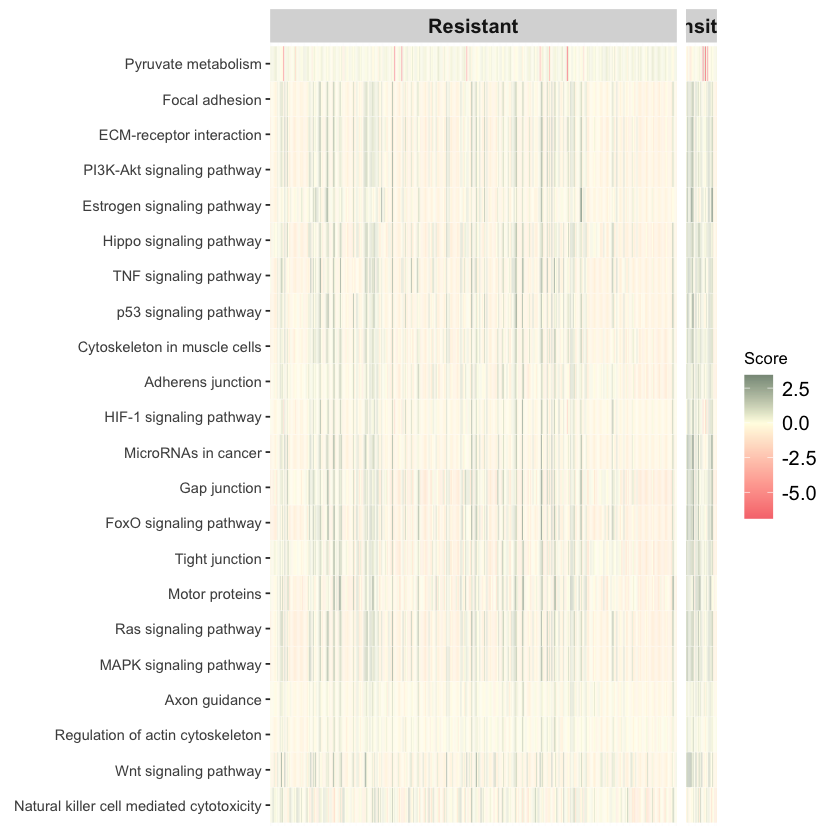

In [11]:
# read GDSC expression matrix and sample files

gdsc_experiment_matrix <- read.delim(paste(pathfindR_dir, "GDSC_Experiment_Matrix_CYTOi_Paclitaxel_First_Strategy.tsv", sep = "/"))
colnames(gdsc_experiment_matrix)[2:ncol(gdsc_experiment_matrix)] <- sub("^X", "", colnames(gdsc_experiment_matrix)[2:ncol(gdsc_experiment_matrix)])
rownames(gdsc_experiment_matrix) <- gdsc_experiment_matrix$symbol
gdsc_experiment_matrix <- gdsc_experiment_matrix[,-1]
gdsc_experiment_matrix <- as.matrix(gdsc_experiment_matrix)
colnames(gdsc_experiment_matrix) <- as.integer(colnames(gdsc_experiment_matrix))

gdsc_cases_data <- read.delim(paste(pathfindR_dir, "GDSC_CYTOi_Paclitaxel_Samples_First_Strategy.tsv", sep ="/"))

filter <- (gdsc_cases_data["Response"] == 0)
cases <- as.character(gdsc_cases_data[filter, "Sample"])

score_matrix <- score_terms(
  enrichment_table = save_filtered,
  exp_mat = gdsc_experiment_matrix,
  cases = cases,
  use_description = TRUE,
  label_samples = FALSE, 
  case_title = "Resistant", 
  control_title = "Sensitive", 
  low = "#f7797d", 
  mid = "#fffde4", 
  high = "#1f4037" 
)

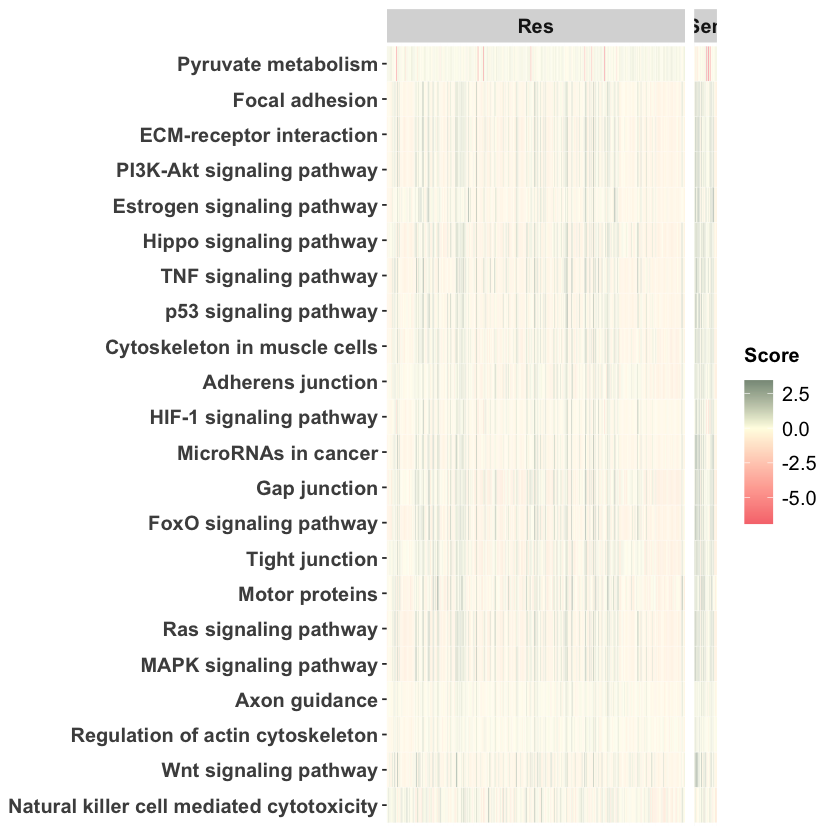

In [12]:
# Generate heatmap and assign it to scores_figure

scores_figure <- plot_scores(
    score_matrix,
    cases = cases,
    label_samples = FALSE,
    case_title = "Res",  
    control_title = "Sen",  
    low = "#f7797d",  
    mid = "#fffde4",  
    high = "#1f4037" 
) +
ggplot2::theme(
    legend.title = ggplot2::element_text(
        size = 12, face = "bold", margin = ggplot2::margin(b = 10)  
    ),
    axis.title.y = ggplot2::element_blank(),          
    axis.text.y = ggplot2::element_text(size = 12, face = "bold"),  
    #legend.text = ggplot2::element_text(size = 12),                
    #strip.text = ggplot2::element_text(size = 18, face = "bold")    
)

scores_figure

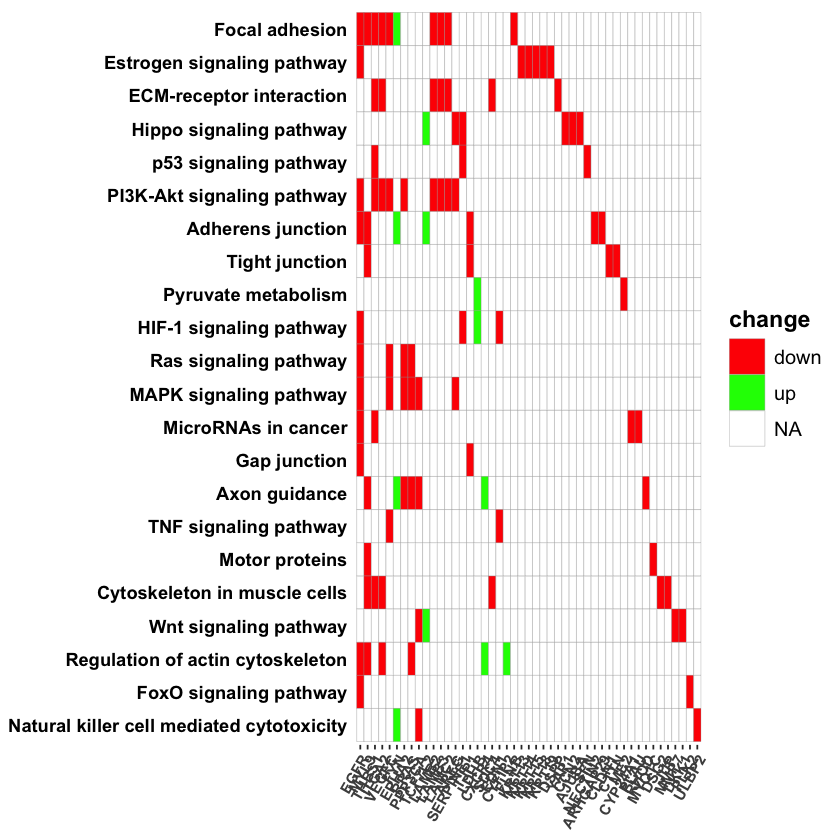

In [13]:
# Generate term-gene heatmap and add a title

term_figure <- term_gene_heatmap(
  save_filtered, 
  num_terms = nrow(score_matrix),
  use_description = TRUE,
  sort_terms_by_p = TRUE
) +
#ggplot2::ggtitle("Mitotic inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap\n") +  
ggplot2::theme(
  #plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                
  legend.key.size = grid::unit(1.5, "lines")                      
)

term_figure

In [19]:


mitosis_terms <- read.table("/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/MITOSISi/Expression_Mutation_CNA/pathfindR/GDSC_PDX_TCGA_First_Strategy/KEGG_figure4/Mitosis_EMC_pathfind_20_terms.tsv",
                            sep = "\t",
                            header = TRUE)
head(mitosis_terms, 3)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa04510,Focal adhesion,4.655366,25,0.14814815,2.339487e-10,3.422870e-09,FYN,"ITGA2, ITGAV, FLNB, MYL9, LAMB2, LAMB3, LAMC2, THBS1, EGFR, VEGFC",1,Representative
2,hsa04512,ECM-receptor interaction,7.709653,25,0.03703704,1.799002e-09,2.448213e-09,,"LAMB2, LAMB3, LAMC2, THBS1, ITGAV, SDC4, ITGA2, DSPP",1,Member
3,hsa04151,PI3K-Akt signaling pathway,2.373521,25,0.16363636,1.194469e-07,4.181967e-07,,"EGFR, EPHA2, AREG, VEGFC, ITGA2, ITGAV, LAMB2, LAMB3, LAMC2, THBS1",1,Member


You may run `combined_results_graph()` to create visualizations of combined term-gene graphs of selected terms



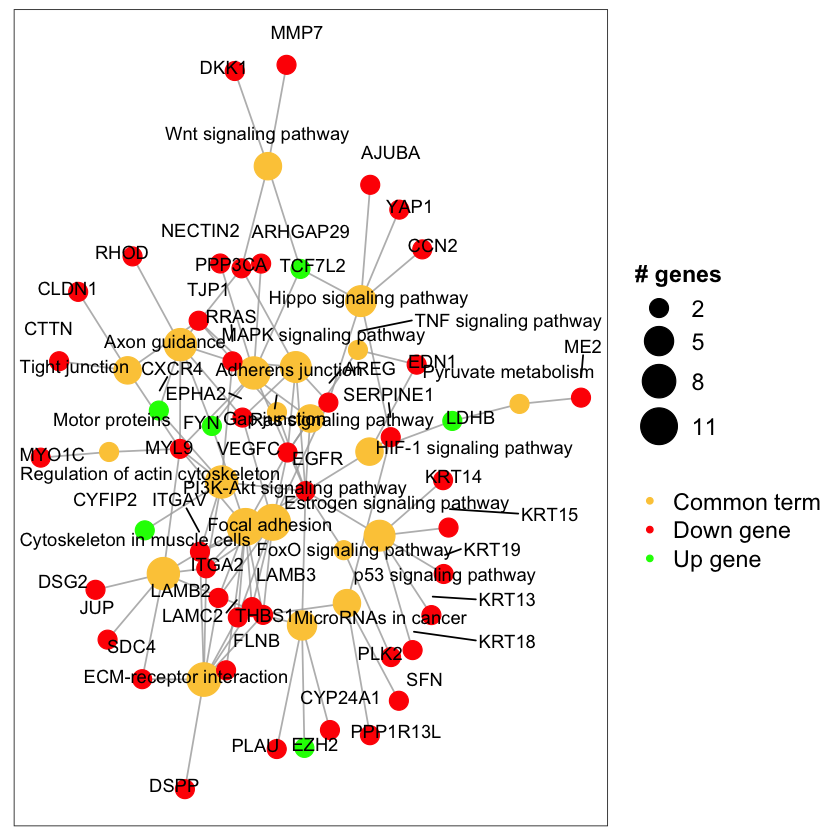

In [21]:
# plot combined mitosis and cytoskeleton terms

combined_df <- combine_pathfindR_results(
  result_A = mitosis_terms,
  result_B = save_filtered,
  plot_common = FALSE
)

combined_figure <- combined_results_graph(combined_df, use_description = TRUE,)+
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_blank(),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
)


ggplot2::ggsave(
  filename = paste(pathfindR_dir, "KEGG_figure5/Combined_graph.pdf", sep = "/"),
  plot = term_gene_figure,
  width = 20,  
  height = 22   
)


combined_figure

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


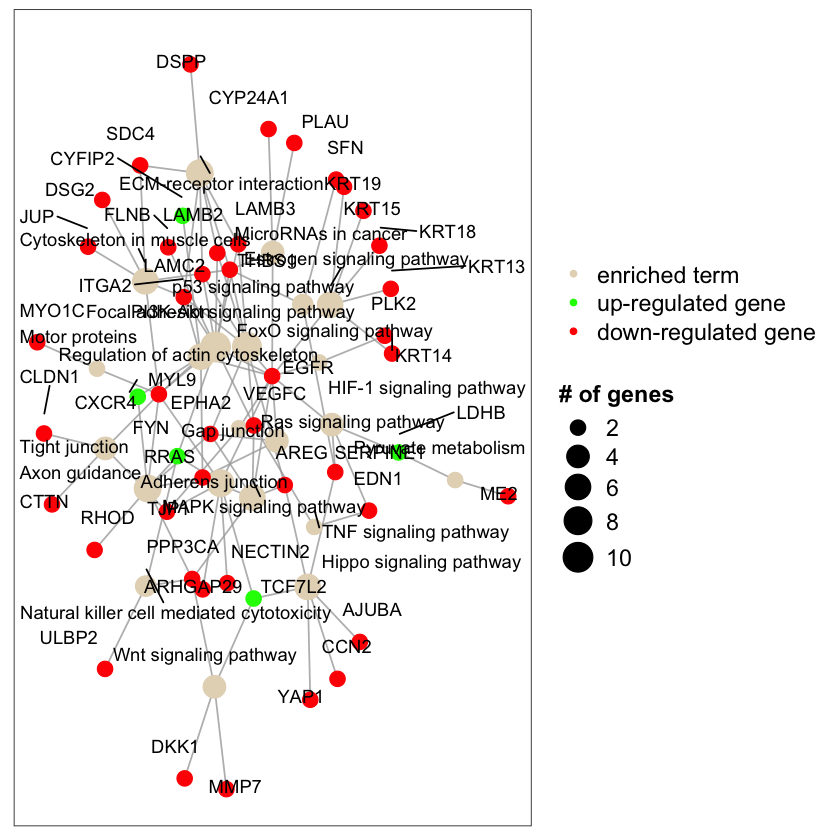

In [22]:
# Generate the term-gene graph and store it in term_gene_figure

term_gene_figure <- term_gene_graph(
  save_filtered, 
  use_description = TRUE,  
  num_terms = 23          
) +
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_blank(),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  

ggplot2::ggsave(
  filename = paste(pathfindR_dir, "KEGG_figure5/Term_Gene_Graph_n20_GDSC.pdf", sep = "/"),
  plot = term_gene_figure,
  width = 20,  
  height = 22   
)

term_gene_figure

Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


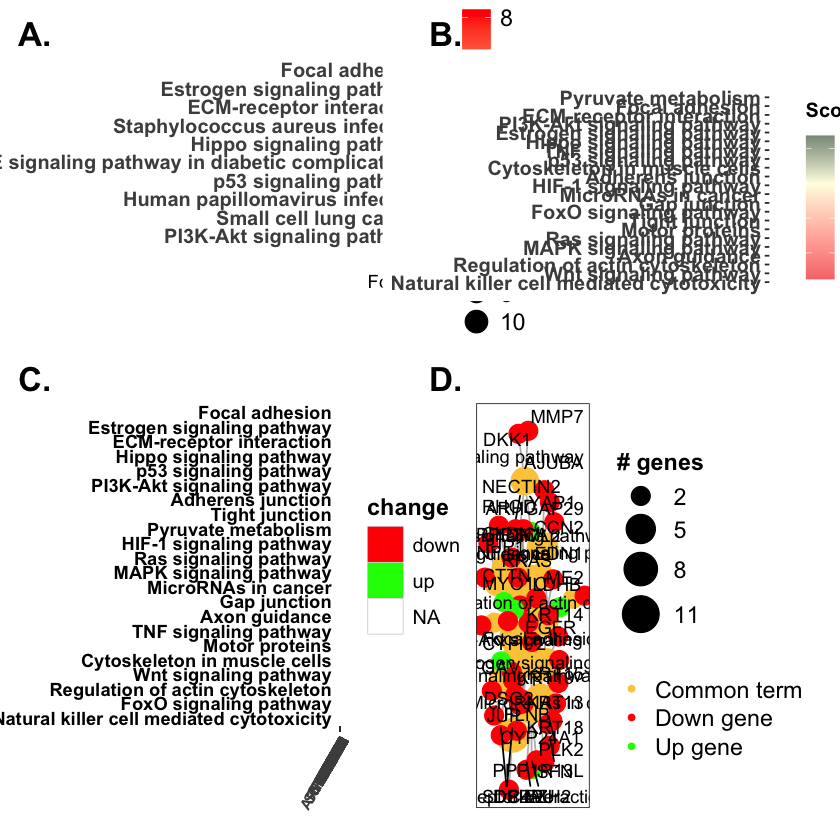

In [26]:
# Define subplot labels manually in the **top-left corner**

plot_a <- fold_enrichment_figure 
plot_b <- scores_figure 
plot_c <- term_figure
plot_d <- combined_figure 

grid_plot <- (wrap_elements(plot_a) + wrap_elements(plot_b)) /
             plot_spacer() /
             (wrap_elements(plot_c) + wrap_elements(plot_d)) +
  plot_layout(
    widths = c(1, 4),   
    heights = c(1, 0.1, 1.7) 
  ) +
  plot_annotation(
    tag_levels = "A",  
    tag_prefix = "",  
    tag_suffix = "."  
    ) & 
    theme(plot.tag = element_text(face = 'bold', size = 20)
)

ggsave(
  filename = paste(output_dir, "Figure 5.jpeg", sep = "/"),
  plot = grid_plot,
  width = 22,   
  height = 12,  
  device = "jpeg"
)

print(grid_plot)